**PROCESO**

In [12]:
import sqlite3
import pandas as pd


Conectar a la base de datos SQLite:

    sqlite3.connect() establece una conexión a la base de datos archivo_base_datos.sqlite almacenada en el archivo local.
    conexion es el objeto que representa la conexión con la base de datos y nos permitirá ejecutar consultas SQL y extraer datos.

In [55]:
conexion = sqlite3.connect('Aviacion_comercial.sqlite')


Consulta para obtener los nombres de las tablas:

    Consulta SQL: "SELECT name FROM sqlite_master WHERE type='table';" es una consulta SQL que devuelve los nombres de todas las tablas dentro de la base de datos.
    pd.read_sql(): Este método ejecuta la consulta SQL sobre la base de datos conectada (conexion) y devuelve los resultados en un DataFrame de pandas. En este caso, el DataFrame tablas contendrá una columna llamada name, con los nombres de todas las tablas de la base de datos.

In [56]:
consulta_tablas = "SELECT name FROM sqlite_master WHERE type='table';"
tablas = pd.read_sql(consulta_tablas, conexion)

Inicializar un DataFrame vacío:

    Creamos un DataFrame vacío llamado df_combinado. Este DataFrame se utilizará para combinar los datos de todas las tablas extraídas de la base de datos SQLite.

In [57]:
df_combinado = pd.DataFrame()

Iterar sobre cada tabla y combinar los datos:

In [58]:
for tabla in tablas['name']:
    df_tabla = pd.read_sql(f"SELECT rowid, * FROM {tabla}", conexion)
    df_combinado = pd.concat([df_combinado, df_tabla], ignore_index=True)


Exportar el DataFrame combinado a un archivo CSV

In [59]:
df_combinado.to_csv('archivo_combinado.csv', index=False)


Importar el CSV a SQL Server Express usando Python (pandas y SQLAlchemy)

Instalar SQLAlchemy y pyodbc

Usando "pip install sqlalchemy pyodbc" en nueva terminal

Configurar la conexión a SQL Server.

In [60]:
# import pandas as pd
from sqlalchemy import create_engine


In [61]:
# Cargar el archivo CSV en un DataFrame de pandas
archivo_csv = 'archivo_combinado.csv'
df = pd.read_csv(archivo_csv)

C:\Users\Belkys Dellamea\AppData\Local\Temp\ipykernel_1448\2718301568.py:3: DtypeWarning: Columns (1,2,4,5,6,7,8,12,13,14,16,17,18,19,20,21,22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo_csv)


In [9]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_combinado = pd.read_csv('archivo_combinado.csv')

#Separacion de las tablas

# Aircraft data
aircraft_data = df_combinado[['aircraft_code', 'model', 'range']].dropna()

# Airports data
airports_data = df_combinado[['airport_code', 'airport_name', 'city', 'coordinates', 'timezone']].dropna()

# Bookings data
bookings = df_combinado[['book_ref', 'book_date', 'total_amount']].dropna()

# Tickets data
tickets = df_combinado[['ticket_no', 'book_ref', 'passenger_id']].dropna()

# Flights data
flights = df_combinado[['flight_id', 'flight_no', 'scheduled_arrival', 'scheduled_departure', 'departure_airport',
                           'arrival_airport', 'status', 'aircraft_code', 'actual_departure', 'actual_arrival']].dropna()

# Seats data
seats = df_combinado[['aircraft_code', 'seat_no', 'fare_conditions']].dropna()

# Boarding Passes data
boarding_passes = df_combinado[['ticket_no', 'flight_id', 'boarding_no', 'seat_no']].dropna()

# Ticket Flights data
ticket_flights = df_combinado[['ticket_no', 'flight_id', 'fare_conditions']].dropna()

# Lista de DataFrames con sus nombres
dataframes = {
    'aircraft_data': aircraft_data,
    'airports_data': airports_data,
    'tickets': tickets,
    'bookings': bookings,
    'flights': flights,
    'seats': seats,
    'boarding_passes': boarding_passes,
    'ticket_flights': ticket_flights
}

# Crear un DataFrame para almacenar los conteos de valores nulos
nan_summary = pd.DataFrame()

# Cuantificar los valores nulos en cada tabla y columna
for name, df in dataframes.items():
    nan_counts = df.isna().sum()
    nan_summary[name] = nan_counts

# Calcular el total de NaN por tabla (sumando todos los valores nulos en las columnas de cada tabla)
total_nan_por_tabla = nan_summary.sum()

# Calcular el total de NaN en todo el conjunto de datos (sumando todos los NaN por tabla)
total_nan = total_nan_por_tabla.sum()

# Imprimir un único número: el total de NaN en todas las tablas
print(f"Total de valores NaN en todas las tablas: {total_nan}")

C:\Users\Belkys Dellamea\AppData\Local\Temp\ipykernel_11688\592756321.py:4: DtypeWarning: Columns (1,2,4,5,6,7,8,12,13,14,16,17,18,19,20,21,22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combinado = pd.read_csv('archivo_combinado.csv')


Total de valores NaN en todas las tablas: 0.0


In [10]:
# Cuantificar los valores nulos en cada tabla
for name, df in dataframes.items():
    nan_counts = df.isna().sum().sum()  # Suma total de NaN en cada tabla
    print(f"Total de NaN en la tabla {name}: {nan_counts}")

Total de NaN en la tabla aircraft_data: 0
Total de NaN en la tabla airports_data: 0
Total de NaN en la tabla tickets: 0
Total de NaN en la tabla bookings: 0
Total de NaN en la tabla flights: 0
Total de NaN en la tabla seats: 0
Total de NaN en la tabla boarding_passes: 0
Total de NaN en la tabla ticket_flights: 0


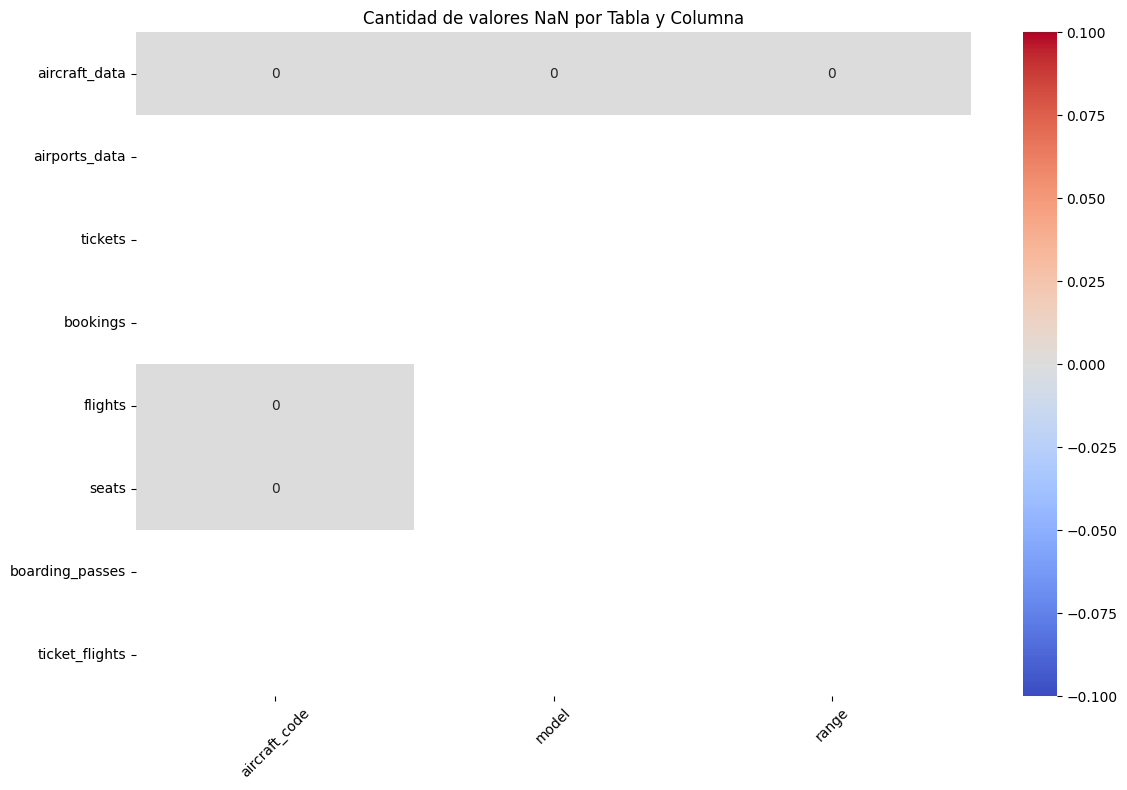

In [7]:
# Graficar los valores NaN usando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(nan_summary, annot=True, cmap='coolwarm', cbar=True)
plt.title('Cantidad de valores NaN por Tabla y Columna')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
# Función para contar NaN y valores vacíos
def contar_nulos_vacios(df):
    # Contar NaN
    nulos = df.isna().sum().sum()
    # Contar valores vacíos (cadenas vacías "")
    vacios = (df == "").sum().sum()
    return nulos, vacios

# Inicializar variables para el total
total_nan = 0
total_vacios = 0

# Cuantificar los valores nulos y vacíos en cada tabla
for name, df in dataframes.items():
    nulos, vacios = contar_nulos_vacios(df)
    total_nan += nulos
    total_vacios += vacios
    print(f"Tabla: {name} - NaN: {nulos}, Vacíos: {vacios}")

# Calcular el total de NaN y vacíos en todo el conjunto de datos
print(f"\nTotal de valores NaN en todas las tablas: {total_nan}")
print(f"Total de valores vacíos en todas las tablas: {total_vacios}")

Tabla: aircraft_data - NaN: 0, Vacíos: 0
Tabla: airports_data - NaN: 0, Vacíos: 0
Tabla: tickets - NaN: 0, Vacíos: 0
Tabla: bookings - NaN: 0, Vacíos: 0
Tabla: flights - NaN: 0, Vacíos: 0
Tabla: seats - NaN: 0, Vacíos: 0
Tabla: boarding_passes - NaN: 0, Vacíos: 0
Tabla: ticket_flights - NaN: 0, Vacíos: 0

Total de valores NaN en todas las tablas: 0
Total de valores vacíos en todas las tablas: 0


El codigo de abajo es correcto v

In [38]:
import pyodbc

""" conn_str = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-C48C4LP\\SQLEXPRESS;DATABASE=base_aviacion;Trusted_Connection=yes;' """

conn_str = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-C48C4LP\\SQLEXPRESS;DATABASE=master;Trusted_Connection=yes;'
connection = pyodbc.connect(conn_str, autocommit=True)


In [39]:
# Crear cursor
cursor = connection.cursor()

In [ ]:
# Crear base de datos
create_db_query = "CREATE DATABASE base_aviacion"


In [41]:
try:
    cursor.execute(create_db_query)
    print("Base de datos creada exitosamente.")
except pyodbc.Error as e:
    print("Error al crear la base de datos ya existe:", e)

# Cerrar cursor y conexión
cursor.close()
connection.close()

Base de datos creada exitosamente.


In [42]:
conn_str = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-C48C4LP\\SQLEXPRESS;DATABASE=base_aviacion;Trusted_Connection=yes;'
connection = pyodbc.connect(conn_str, autocommit=True)
cursor = connection.cursor()    
try:
    cursor.execute('''
    -- Tabla Aircraft Data
    CREATE TABLE aircraft_data (
        aircraft_code VARCHAR(10) PRIMARY KEY,
        model VARCHAR(100),
        range DECIMAL(10, 2)
    );
    ''')

    cursor.execute('''
    -- Tabla Airports Data
    CREATE TABLE airports_data (
        airport_code VARCHAR(10) PRIMARY KEY,
        airport_name VARCHAR(100),
        city VARCHAR(100),
        coordinates VARCHAR(100),
        timezone VARCHAR(50)
    );
    ''')

    cursor.execute('''
    -- Tabla Bookings
    CREATE TABLE bookings (
        rowid INT IDENTITY(1,1) PRIMARY KEY,
        book_ref VARCHAR(20) UNIQUE,
        book_date DATETIME2,
        total_amount DECIMAL(10, 2)
    );
    ''')

    cursor.execute('''
    -- Tabla Tickets
    CREATE TABLE tickets (
        rowid INT IDENTITY(1,1) PRIMARY KEY,
        ticket_no BIGINT UNIQUE,
        book_ref VARCHAR(20),
        passenger_id VARCHAR(20),
        FOREIGN KEY (book_ref) REFERENCES bookings(book_ref)
    );
    ''')

    cursor.execute('''
    -- Tabla Flights
    CREATE TABLE flights (
        rowid INT IDENTITY(1,1) PRIMARY KEY,
        flight_id INT UNIQUE,
        flight_no VARCHAR(10),
        scheduled_arrival DATETIME2,
        scheduled_departure DATETIME2,
        departure_airport VARCHAR(10),
        arrival_airport VARCHAR(10),
        status VARCHAR(20),
        aircraft_code VARCHAR(10),
        actual_departure DATETIME2,
        actual_arrival DATETIME2,
        FOREIGN KEY (departure_airport) REFERENCES airports_data(airport_code),
        FOREIGN KEY (arrival_airport) REFERENCES airports_data(airport_code),
        FOREIGN KEY (aircraft_code) REFERENCES aircraft_data(aircraft_code)
    );
    ''')

    cursor.execute('''
    -- Tabla Seats
    CREATE TABLE seats (
        rowid INT IDENTITY(1,1) PRIMARY KEY,
        aircraft_code VARCHAR(10),
        seat_no VARCHAR(10),
        fare_conditions VARCHAR(50),
        FOREIGN KEY (aircraft_code) REFERENCES aircraft_data(aircraft_code)
    );
    ''')

    cursor.execute('''
    -- Tabla Boarding Passes
    CREATE TABLE boarding_passes (
        rowid INT IDENTITY(1,1) PRIMARY KEY,
        ticket_no BIGINT,
        flight_id INT,
        boarding_no INT,
        seat_no VARCHAR(10),
        FOREIGN KEY (ticket_no) REFERENCES tickets(ticket_no),
        FOREIGN KEY (flight_id) REFERENCES flights(flight_id)
    );
    ''')

    cursor.execute('''
    -- Tabla Ticket Flights
    CREATE TABLE ticket_flights (
        rowid INT IDENTITY(1,1) PRIMARY KEY,
        ticket_no BIGINT,
        flight_id INT,
        fare_conditions VARCHAR(50),
        FOREIGN KEY (ticket_no) REFERENCES tickets(ticket_no),
        FOREIGN KEY (flight_id) REFERENCES flights(flight_id)
    );
    ''')

    # Confirmar los cambios
    connection.commit()
    print("Tablas creadas exitosamente.")

except pyodbc.Error as e:
    print("Error al conectarse a la base de datos:", e)
finally:
    # Cerrar cursor y conexión
    if 'cursor' in locals():
        cursor.close()
    if 'connection' in locals():
        connection.close()

Tablas creadas exitosamente.


In [ ]:
conn_str = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-C48C4LP\\SQLEXPRESS;DATABASE=base_aviacion;Trusted_Connection=yes;'
connection = pyodbc.connect(conn_str, autocommit=True)
cursor = connection.cursor()


df_combinado = pd.read_csv('archivo_combinado.csv')

#Separacion de las tablas

# Aircraft data
df_aircraft_data = df_combinado[['aircraft_code', 'model', 'range']].dropna()

# Airports data
df_airports_data = df_combinado[['airport_code', 'airport_name', 'city', 'coordinates', 'timezone']].dropna()

# Bookings data
df_bookings = df_combinado[['book_ref', 'book_date', 'total_amount']].dropna()

# Tickets data
df_tickets = df_combinado[['ticket_no', 'book_ref', 'passenger_id']].dropna()

# Flights data
df_flights = df_combinado[['flight_id', 'flight_no', 'scheduled_arrival', 'scheduled_departure', 'departure_airport',
                           'arrival_airport', 'status', 'aircraft_code', 'actual_departure', 'actual_arrival']].dropna()

# Seats data
df_seats = df_combinado[['aircraft_code', 'seat_no', 'fare_conditions']].dropna()

# Boarding Passes data
df_boarding_passes = df_combinado[['ticket_no', 'flight_id', 'boarding_no', 'seat_no']].dropna()

# Ticket Flights data
df_ticket_flights = df_combinado[['ticket_no', 'flight_id', 'fare_conditions']].dropna()

print(f"Number of rows: {df_aircraft_data.shape[0]}")

print(df_aircraft_data.tail())

# Insertar datos en la tabla aircraft_data
insert_aircraft_data = """
    INSERT INTO aircraft_data (aircraft_code, model, range)
    VALUES (?, ?, ?)
"""

# Insertar los datos fila por fila
for index, row in df_aircraft_data.iterrows():
    print(index)
    print(insert_aircraft_data, row['aircraft_code'], row['model'], row['range'])
    cursor.execute(insert_aircraft_data, row['aircraft_code'], row['model'], row['range'])


# Insertar datos en la tabla airports_data
insert_airports_data = """
    INSERT INTO airports_data (airport_code, airport_name, city, coordinates, timezone)
    VALUES (?, ?, ?, ?, ?)
"""

for index, row in df_airports_data.iterrows():
    cursor.execute(insert_airports_data, row['airport_code'], row['airport_name'], row['city'], row['coordinates'], row['timezone'])

print('finalizo airports_data')


# Insertar datos en la tabla bookings
insert_bookings = """
    INSERT INTO bookings (book_ref, book_date, total_amount)
    VALUES (?, ?, ?)
"""
# Convertir la columna 'book_date' a formato datetime
df_bookings['book_date'] = pd.to_datetime(df_bookings['book_date'], format='%Y-%m-%d', errors='coerce')

# Verificar si hay fechas inválidas
print(df_bookings[df_bookings['book_date'].isna()])



for index, row in df_bookings.iterrows():
    cursor.execute(insert_bookings, row['book_ref'], row['book_date'], row['total_amount'])

print('finalizo bookings')

# Insertar datos en la tabla tickets
insert_tickets = """
    INSERT INTO tickets (ticket_no, book_ref, passenger_id)
    VALUES (?, ?, ?)
"""

df_tickets = df_tickets.drop_duplicates(subset='ticket_no', keep='first')

for index, row in df_tickets.iterrows():
    # Verificar si el ticket ya existe
    cursor.execute("SELECT COUNT(*) FROM tickets WHERE ticket_no = ?", (row['ticket_no'],))
    if cursor.fetchone()[0] == 0:  # Si no existe, insertar
        cursor.execute(insert_tickets, row['ticket_no'], row['book_ref'], row['passenger_id'])

print('finalizo ticket')
""" for index, row in df_tickets.iterrows():
    cursor.execute(insert_tickets, row['ticket_no'], row['book_ref'], row['passenger_id']) """


# Insertar datos en la tabla flights
insert_flights = """
    INSERT INTO flights (flight_id, flight_no, scheduled_arrival, scheduled_departure, 
                         departure_airport, arrival_airport, status, aircraft_code, actual_departure, actual_arrival)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
"""
# Convertir la columna 'book_date' a formato datetime
df_flights['scheduled_arrival'] = pd.to_datetime(df_flights['scheduled_arrival'], format='%Y-%m-%d', errors='coerce')
df_flights['scheduled_departure'] = pd.to_datetime(df_flights['scheduled_departure'], format='%Y-%m-%d', errors='coerce')
df_flights['actual_departure'] = pd.to_datetime(df_flights['actual_departure'], format='%Y-%m-%d', errors='coerce')
df_flights['actual_arrival'] = pd.to_datetime(df_flights['actual_arrival'], format='%Y-%m-%d', errors='coerce')

for index, row in df_flights.iterrows():
    cursor.execute(insert_flights, row['flight_id'], row['flight_no'], row['scheduled_arrival'], row['scheduled_departure'],
                   row['departure_airport'], row['arrival_airport'], row['status'], row['aircraft_code'], 
                   row['actual_departure'], row['actual_arrival'])
print('finalizo flights')


# Insertar datos en la tabla seats
insert_seats = """
    INSERT INTO seats (aircraft_code, seat_no, fare_conditions)
    VALUES (?, ?, ?)
"""

for index, row in df_seats.iterrows():
    cursor.execute(insert_seats, row['aircraft_code'], row['seat_no'], row['fare_conditions'])
print('finalizo seats')


# Insertar datos en la tabla boarding_passes
insert_boarding_passes = """
    INSERT INTO boarding_passes (ticket_no, flight_id, boarding_no, seat_no)
    VALUES (?, ?, ?, ?)
"""

for index, row in df_boarding_passes.iterrows():
    cursor.execute(insert_boarding_passes, row['ticket_no'], row['flight_id'], row['boarding_no'], row['seat_no'])
print('finalizo boarding_passes')


# Insertar datos en la tabla ticket_flights
insert_ticket_flights = """
    INSERT INTO ticket_flights (ticket_no, flight_id, fare_conditions)
    VALUES (?, ?, ?)
"""

for index, row in df_ticket_flights.iterrows():
    cursor.execute(insert_ticket_flights, row['ticket_no'], row['flight_id'], row['fare_conditions'])
print('finalizo tickets_flights')

# Hacer commit para guardar los cambios
connection.commit()

# Cerrar cursor y conexión
cursor.close()
connection.close()

print("Datos insertados exitosamente.")

C:\Users\Belkys Dellamea\AppData\Local\Temp\ipykernel_11404\1985339277.py:7: DtypeWarning: Columns (1,2,4,5,6,7,8,12,13,14,16,17,18,19,20,21,22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combinado = pd.read_csv('archivo_combinado.csv')


Number of rows: 9
  aircraft_code                                              model   range
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...  5600.0
5           319  {"en": "Airbus A319-100", "ru": "Аэробус A319-...  6700.0
6           733    {"en": "Boeing 737-300", "ru": "Боинг 737-300"}  4200.0
7           CN1  {"en": "Cessna 208 Caravan", "ru": "Сессна 208...  1200.0
8           CR2  {"en": "Bombardier CRJ-200", "ru": "Бомбардье ...  2700.0
0

    INSERT INTO aircraft_data (aircraft_code, model, range)
    VALUES (?, ?, ?)
 773 {"en": "Boeing 777-300", "ru": "Боинг 777-300"} 11100.0
1

    INSERT INTO aircraft_data (aircraft_code, model, range)
    VALUES (?, ?, ?)
 763 {"en": "Boeing 767-300", "ru": "Боинг 767-300"} 7900.0
2

    INSERT INTO aircraft_data (aircraft_code, model, range)
    VALUES (?, ?, ?)
 SU9 {"en": "Sukhoi Superjet-100", "ru": "Сухой Суперджет-100"} 3000.0
3

    INSERT INTO aircraft_data (aircraft_code, model, range)
    VALUES (?, ?, ?)
 320